In [2]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt

from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate
from linear_cost import linear_costNoReg
from linear_cost_derivate import linear_cost_derivateNoReg


# Obtención de la información del csv

In [3]:
my_data = genfromtxt('Admission_Predict.csv', delimiter=',')
my_data

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       ...,
       [398.  , 330.  , 116.  , ...,   9.45,   1.  ,   0.91],
       [399.  , 312.  , 103.  , ...,   8.78,   0.  ,   0.67],
       [400.  , 333.  , 117.  , ...,   9.66,   1.  ,   0.95]])

my_data = np.delete(my_data , 0, 0) #Eliminar los titulos
my_data = np.delete(my_data , 0, 1) #Eliminar el No. serial
my_data = np.delete(my_data , 2, 1) #Eliminar University Rating
my_data = np.delete(my_data , 5, 1) #Eliminar Research

In [5]:
trainning_set = my_data[:my_data.shape[0] * 60 // 100, ]
trainning_set.shape[0] 

240

In [133]:
test_set = my_data[my_data.shape[0] * 60 // 100:, ]
trainning_set.shape[0] 

240

Con el objetivo de identificar las variables utiles y el grado con el que se pueden utilizar, se grafica cada una en relción a la probabilidad de ingreso 

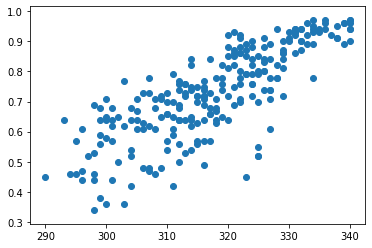

In [6]:
plt.scatter(trainning_set[:,0], trainning_set[:,5]) #GRE Score
plt.show()

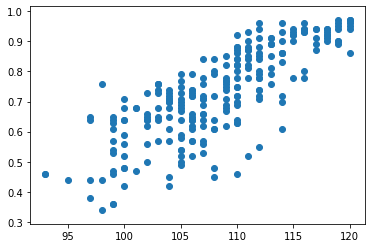

In [7]:
plt.scatter(trainning_set[:,1], trainning_set[:,5]) #ToEFL SCORE
plt.show()

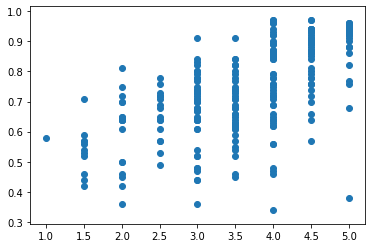

In [8]:
plt.scatter(trainning_set[:,2], trainning_set[:,5]) #SOP
plt.show()

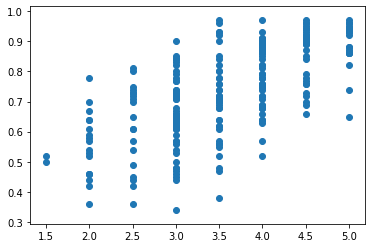

In [9]:
plt.scatter(trainning_set[:,3], trainning_set[:,5]) #LOR
plt.show()

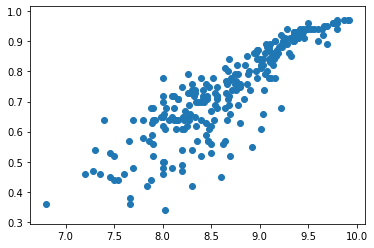

In [10]:
plt.scatter(trainning_set[:,4], trainning_set[:,5]) #CGPA
plt.show()

Por la distribución de puntos se utilizará las variables de GRE y CPGA

# CGPA

Nota: Los valores se fueron modificando si se indetifico un mejor indice para alguno de las varibles en las graficas previas a las pruebas

In [40]:
X = np.vstack((np.ones(trainning_set.shape[0]),trainning_set[:,4])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((trainning_set[:,5]))
#X

In [41]:
theta_0 = np.random.rand(2, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0001,
    treshold=0.0001,
    max_iter=1000,
    lambd = 15
)
theta

array([[0.38355039],
       [0.04106769]])

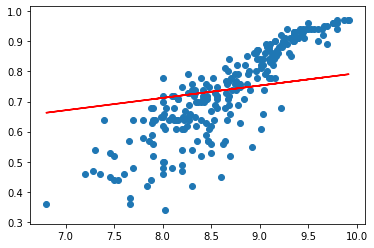

In [42]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

Evaluación de cantidad de iteraciones

In [19]:
iteration = []
linearCosts = []
for i in range(100, 10000):
    theta, _ , _ = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost,
        linear_cost_derivate,
        alpha=0.0001,
        treshold=0.001,
        max_iter=i,
        lambd = 15
    )
    linearCosts.append(linear_cost(X, y, theta, 1))
    iteration.append(i)
#X

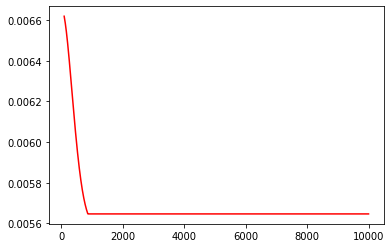

In [20]:
plt.plot(iteration, linearCosts, color='red')
plt.show()
#y

Evaluación del valor de lambda , menor a 1 y hasta 100

In [43]:
iteration = []
linearCosts = []
for i in range(0, 1000):
    theta, _ , _ = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost,
        linear_cost_derivate,
        alpha=0.0001,
        treshold=0.0001,
        max_iter=1000,
        lambd = i / 1000
    )
    linearCosts.append(linear_costNoReg(X, y, theta))
    iteration.append(i/1000)

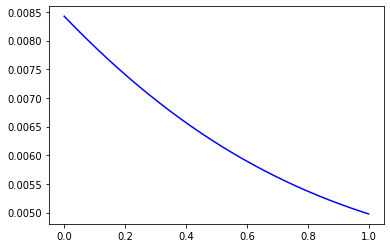

In [44]:
plt.plot(iteration, linearCosts, color='blue')
plt.show()

In [47]:
iteration = []
linearCosts = []
for i in range(0, 30):
    theta, _ , _ = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost,
        linear_cost_derivate,
        alpha=0.0001,
        treshold=0.0001,
        max_iter=1000,
        lambd = i
    )
    linearCosts.append(linear_costNoReg(X, y, theta))
    iteration.append(i)

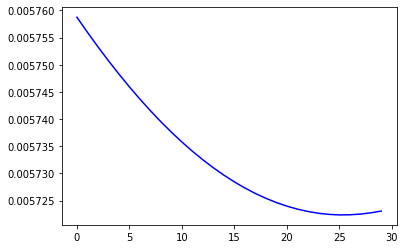

In [48]:

plt.plot(iteration, linearCosts, color='blue')
plt.show()


# Prueba para la variable elevada al cuadrado

In [53]:
iteration = []
linearCosts = []
Xt = X
theta_0 = np.random.rand(3, 1)
Xt = np.hstack((Xt ,np.vstack((X[:,1] ** 2)) ))
theta, _,_ = gradient_descent(
    Xt,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0001,
    treshold=0.0001,
    max_iter=1000,
    lambd = 0.3
)
linearCosts.append(linear_costNoReg(Xt, y, theta))
iteration.append(i)

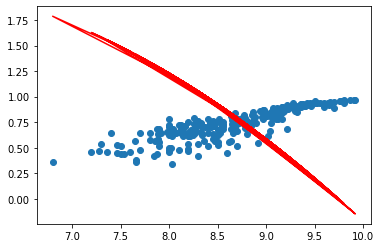

In [55]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(Xt, theta), color='red')
plt.show()

In [ ]:
Se descarta la potencia al cuadrado

# Prueba para la variable elevada al cubo

In [57]:
iteration = []
linearCosts = []
Xt = X
theta_0 = np.random.rand(4, 1)
Xt = np.hstack((Xt ,np.vstack((X[:,1] ** 2)) ))
Xt = np.hstack((Xt ,np.vstack((X[:,1] ** 3)) ))
theta, _,_ = gradient_descent(
    Xt,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0001,
    treshold=0.0001,
    max_iter=1000,
    lambd = 0.3
)
linearCosts.append(linear_costNoReg(Xt, y, theta))
iteration.append(i)

/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/linear_cost.py:6: RuntimeWarning: overflow encountered in square
  sq = (y - h) ** 2
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/linear_cost.py:7: RuntimeWarning: overflow encountered in square
  theta = lambd * (theta ** 2)#
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/linear_cost_derivate.py:6: RuntimeWarning: overflow encountered in matmul
  return (np.matmul((h - y).T, X).T + (lambd * theta)) / m
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/gradient_descent.py:18: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * cost_derivate(

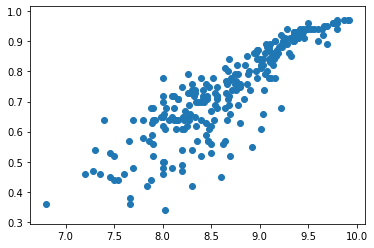

In [58]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(Xt, theta), color='red')
plt.show()

In [60]:
linearCosts

[nan]

Los valores de costo se indefinen, por lo que descarta la consideración de la variable para el modelo. 

# GRE

In [94]:
X = np.vstack((np.ones(trainning_set.shape[0]),trainning_set[:,0])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((trainning_set[:,5]))
#X

In [95]:
theta_0 = np.random.rand(2, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=1000,
    lambd = 1
)
theta

array([[ 7.71708005e-01],
       [-1.19938961e-04]])

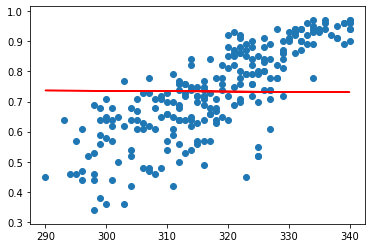

In [96]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

Prueba para el valor de lambda

In [97]:
iteration = []
linearCosts = []
for i in range(0, 1000):
    theta, _ , _ = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost,
        linear_cost_derivate,
        alpha=0.00001,
        treshold=0.00001,
        max_iter=1000,
        lambd = i / 1000
    )
    linearCosts.append(linear_costNoReg(X, y, theta))
    iteration.append(i/1000)

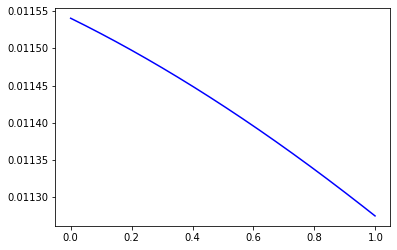

In [98]:
plt.plot(iteration, linearCosts, color='blue')
plt.show()

In [99]:
iteration = []
linearCosts = []
for i in range(1, 1000):
    theta, _ , _ = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost,
        linear_cost_derivate,
        alpha=0.00001,
        treshold=0.00001,
        max_iter=1000,
        lambd = i 
    )
    linearCosts.append(linear_costNoReg(X, y, theta))
    iteration.append(i)

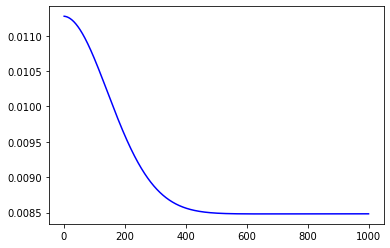

In [100]:
plt.plot(iteration, linearCosts, color='blue')
plt.show()

# Prueba para la variable elevada al cuadrado

In [103]:
X

array([[  1., 337.],
       [  1., 324.],
       [  1., 316.],
       [  1., 322.],
       [  1., 314.],
       [  1., 330.],
       [  1., 321.],
       [  1., 308.],
       [  1., 302.],
       [  1., 323.],
       [  1., 325.],
       [  1., 327.],
       [  1., 328.],
       [  1., 307.],
       [  1., 311.],
       [  1., 314.],
       [  1., 317.],
       [  1., 319.],
       [  1., 318.],
       [  1., 303.],
       [  1., 312.],
       [  1., 325.],
       [  1., 328.],
       [  1., 334.],
       [  1., 336.],
       [  1., 340.],
       [  1., 322.],
       [  1., 298.],
       [  1., 295.],
       [  1., 310.],
       [  1., 300.],
       [  1., 327.],
       [  1., 338.],
       [  1., 340.],
       [  1., 331.],
       [  1., 320.],
       [  1., 299.],
       [  1., 300.],
       [  1., 304.],
       [  1., 307.],
       [  1., 308.],
       [  1., 316.],
       [  1., 313.],
       [  1., 332.],
       [  1., 326.],
       [  1., 322.],
       [  1., 329.],
       [  1.,

In [109]:
iteration = []
linearCosts = []
Xt = X
theta_0 = np.random.rand(3, 1)
Xt = np.hstack((Xt ,np.vstack((X[:,1] ** 2)) ))
theta, _,_ = gradient_descent(
    Xt,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=100,
    lambd = 300
)
linearCosts.append(linear_costNoReg(Xt, y, theta))
iteration.append(i)

/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/linear_cost.py:6: RuntimeWarning: overflow encountered in square
  sq = (y - h) ** 2
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/linear_cost.py:7: RuntimeWarning: overflow encountered in square
  theta = lambd * (theta ** 2)#
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/linear_cost_derivate.py:6: RuntimeWarning: overflow encountered in matmul
  return (np.matmul((h - y).T, X).T + (lambd * theta)) / m
/home/paul/Documents/Inteligencia Artificial/Gradient-decent/gradientDecent/linreg/gradient_descent.py:18: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * cost_derivate(X, y, theta,lambd)


Se descarta por la potencia sobrepasa el límite

Por lo tanto se utliza ambas variables de forma lineal

# Prueba con CGPA

In [167]:
X = np.vstack((np.ones(trainning_set.shape[0]),trainning_set[:,4])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((trainning_set[:,5]))
#X

In [171]:
theta_0 = np.random.rand(2, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0001,
    treshold=0.0001,
    max_iter=1000,
    lambd = 25
)
theta

array([[0.47523033],
       [0.02937888]])

In [172]:
X = np.vstack((np.ones(test_set.shape[0]),test_set[:,4])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((test_set[:,5]))
#X

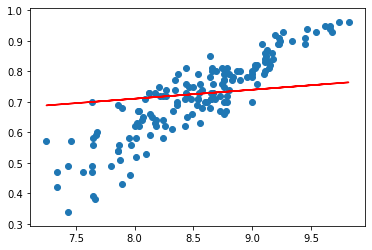

In [173]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

# Prueba con GRE

In [149]:
X = np.vstack((np.ones(trainning_set.shape[0]),trainning_set[:,0])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((trainning_set[:,5]))
#X

In [156]:
theta_0 = np.random.rand(2, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=10000,
    lambd = 500
)
theta

array([[0.23399614],
       [0.00154077]])

In [157]:
X = np.vstack((np.ones(test_set.shape[0]),test_set[:,0])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((test_set[:,5]))
#X

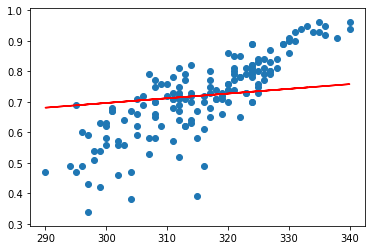

In [158]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

# Prueba en conjunto

In [186]:
X = np.vstack((np.ones(trainning_set.shape[0]),trainning_set[:,4],trainning_set[:,0])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((trainning_set[:,5]))
X

array([[  1.  ,   9.65, 337.  ],
       [  1.  ,   8.87, 324.  ],
       [  1.  ,   8.  , 316.  ],
       [  1.  ,   8.67, 322.  ],
       [  1.  ,   8.21, 314.  ],
       [  1.  ,   9.34, 330.  ],
       [  1.  ,   8.2 , 321.  ],
       [  1.  ,   7.9 , 308.  ],
       [  1.  ,   8.  , 302.  ],
       [  1.  ,   8.6 , 323.  ],
       [  1.  ,   8.4 , 325.  ],
       [  1.  ,   9.  , 327.  ],
       [  1.  ,   9.1 , 328.  ],
       [  1.  ,   8.  , 307.  ],
       [  1.  ,   8.2 , 311.  ],
       [  1.  ,   8.3 , 314.  ],
       [  1.  ,   8.7 , 317.  ],
       [  1.  ,   8.  , 319.  ],
       [  1.  ,   8.8 , 318.  ],
       [  1.  ,   8.5 , 303.  ],
       [  1.  ,   7.9 , 312.  ],
       [  1.  ,   8.4 , 325.  ],
       [  1.  ,   9.5 , 328.  ],
       [  1.  ,   9.7 , 334.  ],
       [  1.  ,   9.8 , 336.  ],
       [  1.  ,   9.6 , 340.  ],
       [  1.  ,   8.8 , 322.  ],
       [  1.  ,   7.5 , 298.  ],
       [  1.  ,   7.2 , 295.  ],
       [  1.  ,   7.3 , 310.  ],
       [  

In [187]:
theta_0 = np.random.rand(3, 1)
theta_0

array([[0.16215531],
       [0.38053737],
       [0.9723806 ]])

In [188]:
theta_0 = np.random.rand(3, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=10000,
    lambd = 10
)
theta

array([[ 0.4278176 ],
       [ 0.8051293 ],
       [-0.02096526]])

In [192]:
X = np.vstack((np.ones(test_set.shape[0]),test_set[:,4],test_set[:,0])).T
#X = np.vstack((trainning_set[:,0]))
y = np.vstack((test_set[:,5]))
X

array([[  1.  ,   7.68, 296.  ],
       [  1.  ,   8.15, 317.  ],
       [  1.  ,   8.76, 324.  ],
       [  1.  ,   9.04, 325.  ],
       [  1.  ,   8.56, 314.  ],
       [  1.  ,   9.02, 328.  ],
       [  1.  ,   8.73, 316.  ],
       [  1.  ,   8.48, 311.  ],
       [  1.  ,   8.87, 324.  ],
       [  1.  ,   8.83, 321.  ],
       [  1.  ,   8.57, 320.  ],
       [  1.  ,   9.  , 316.  ],
       [  1.  ,   8.54, 318.  ],
       [  1.  ,   9.68, 335.  ],
       [  1.  ,   9.12, 321.  ],
       [  1.  ,   8.37, 307.  ],
       [  1.  ,   8.56, 309.  ],
       [  1.  ,   8.64, 324.  ],
       [  1.  ,   8.76, 326.  ],
       [  1.  ,   9.34, 331.  ],
       [  1.  ,   9.13, 327.  ],
       [  1.  ,   8.09, 312.  ],
       [  1.  ,   8.36, 308.  ],
       [  1.  ,   8.79, 324.  ],
       [  1.  ,   8.76, 325.  ],
       [  1.  ,   8.68, 313.  ],
       [  1.  ,   8.45, 312.  ],
       [  1.  ,   8.17, 314.  ],
       [  1.  ,   9.14, 327.  ],
       [  1.  ,   8.34, 308.  ],
       [  

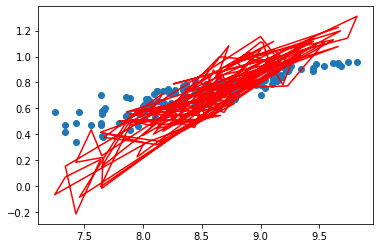

In [193]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

Por lo tanto el modelo ideal optnido es 

\begin{equation}
c = 0.4278176 - 0.8051293 * \frac{cgpa}{100} + -0.02096526 * \frac{gre}{1000} 
\end{equation}

# Conclusión

En conclusión el modelo optenido con el mejor indice de predicción, está dado por la formula descrita anteriormente. Dentro de las complicaciones principales, tanto el valor de lambda como alpha, cuenta con un complejidad considerable dentro del modelo. Por lo que se recomienda hacer enfasís a la hora de realizar un modelo de decenso al gradiente , en el valor de estas constantes